In [1]:
#!pip3 install mlrose

In [2]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np
import matplotlib.pyplot as plt
import time

## Four Peaks

### RHC tuning

6 10 15 30 

Text(0, 0.5, 'Fitness score')

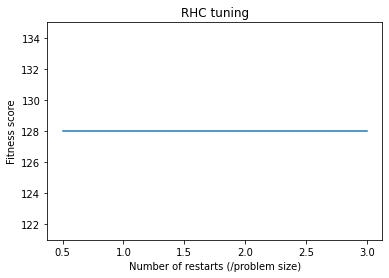

In [88]:
tests = [0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0]
scores = [0.0]*len(tests)
init_states = np.array(50*[1, 0])
for l in [6, 10, 15, 30]:
    print(l, end=' ')
    for i, j in enumerate(tests):
        for k in range(2):
            problem = mlrose.DiscreteOpt(length = int(l), fitness_fn = mlrose.FourPeaks(t_pct=0.3), maximize = True, max_val = 2)
            init_state = np.array(init_states[:l])
            best_state, best_fitness, fitness_curve = mlrose.hill_climb(problem, restarts = int(l*j), init_state = init_state, curve=True, random_state=0)
            scores[i] += best_fitness
plt.plot(tests, scores)
plt.title('RHC tuning')
plt.xlabel('Number of restarts (/problem size)')
plt.ylabel('Fitness score')

Text(0, 0.5, 'Fitness score')

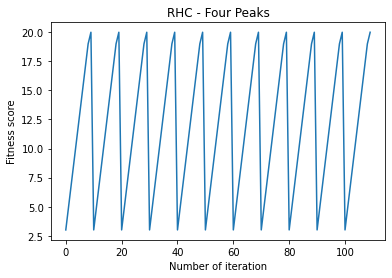

In [106]:
init_states = np.array(50*[1, 0])
problem = mlrose.DiscreteOpt(length = 20, fitness_fn = mlrose.FourPeaks(t_pct=0.3), maximize = True, max_val = 2)
best_state, best_fitness, fitness_curve = mlrose.hill_climb(problem, restarts = 10, init_state = init_state[:20], curve=True, random_state=0)
plt.plot(fitness_curve)
plt.title('RHC - Four Peaks')
plt.xlabel('Number of iteration')
plt.ylabel('Fitness score')

### SA tuning

6 10 15 30 

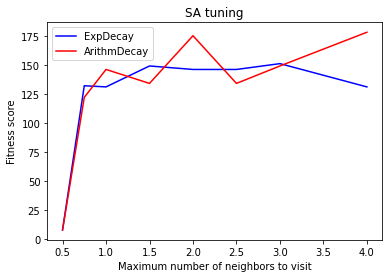

In [95]:
tests = [0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0]
scores_ExpDecay = [0.0]*len(tests)
scores_ArithDecay = [0.0]*len(tests)
init_states = np.array(50*[1, 0])
for l in [6, 10, 15, 30]:
    print(l, end=' ')
    for i, j in enumerate(tests):
        problem = mlrose.DiscreteOpt(length = int(l), fitness_fn = mlrose.FourPeaks(t_pct=0.3), maximize = True, max_val = 2)
        init_state = np.array(init_states[:l])
        for k in range(2):
            best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = mlrose.ExpDecay(), 
                                                                         max_attempts = int(l*i), init_state = init_state, curve=True, random_state=0)
            scores_ExpDecay[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = mlrose.ArithDecay(), 
                                                                         max_attempts = int(l*i), init_state = init_state, curve=True, random_state=0)
            scores_ArithDecay[i] += best_fitness
plt.title('SA tuning')
plt.xlabel('Maximum number of neighbors to visit')
plt.ylabel('Fitness score')
plt.plot(tests, scores_ExpDecay, c='blue', label='ExpDecay')
plt.plot(tests, scores_ArithDecay, c='red', label='ArithmDecay')
plt.legend()

Text(0, 0.5, 'Fitness score')

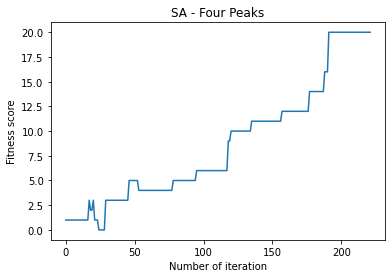

In [104]:
init_states = np.array(50*[1, 0])
problem = mlrose.DiscreteOpt(length = 20, fitness_fn = mlrose.FourPeaks(t_pct=0.3), maximize = True, max_val = 2)
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = mlrose.ExpDecay(), 
                                                                         max_attempts = 1.5*20, init_state = init_state[:20], curve=True, random_state=0)
plt.plot(fitness_curve)
plt.title('SA - Four Peaks')
plt.xlabel('Number of iteration')
plt.ylabel('Fitness score')

### GA tuning

6 10 15 30 

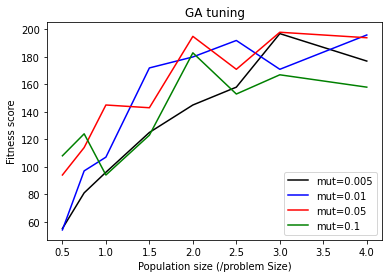

In [98]:
tests = [0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0]
scores_v_low_mut = [0.0]*len(tests)
scores_low_mut = [0.0]*len(tests)
scores_norm_mut = [0.0]*len(tests)
scores_high_mut = [0.0]*len(tests)
init_states = np.array(50*[1, 0])
for l in [6, 10, 15, 30]:
    print(l, end=' ')
    for i, j in enumerate(tests):
        problem = mlrose.DiscreteOpt(length = int(l), fitness_fn = mlrose.FourPeaks(t_pct=0.3), maximize = True, max_val = 2)
        init_state = np.array(init_states[:l])
        for k in range(2):
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(l*j), mutation_prob=0.005,
                                                          max_attempts = int(l), curve=True, random_state=0)
            scores_v_low_mut[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(l*j), mutation_prob=0.01,
                                                          max_attempts = int(l), curve=True, random_state=0)
            scores_low_mut[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(l*j), mutation_prob=0.05,
                                                          max_attempts = int(l), curve=True, random_state=0)
            scores_norm_mut[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(l*j), mutation_prob=0.1,
                                                          max_attempts = int(l), curve=True, random_state=0)
            scores_high_mut[i] += best_fitness
plt.plot(tests, scores_v_low_mut, c='black', label='mut=0.005')
plt.plot(tests, scores_low_mut, c='blue', label='mut=0.01')
plt.plot(tests, scores_norm_mut, c='red', label='mut=0.05')
plt.plot(tests, scores_high_mut, c='green', label='mut=0.1')
plt.title('GA tuning')
plt.xlabel('Population size (/problem Size)')
plt.ylabel('Fitness score')
plt.legend()

Text(0, 0.5, 'Fitness score')

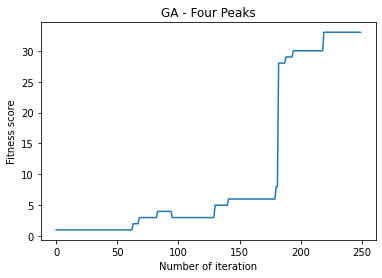

In [105]:
init_states = np.array(50*[1, 0])
problem = mlrose.DiscreteOpt(length = 20, fitness_fn = mlrose.FourPeaks(t_pct=0.3), maximize = True, max_val = 2)
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = mlrose.ExpDecay(), 
                                                                         max_attempts = 1.5*20, init_state = init_state[:20], curve=True, random_state=0)
plt.plot(fitness_curve)
plt.title('GA - Four Peaks')
plt.xlabel('Number of iteration')
plt.ylabel('Fitness score')

### Mimic tuning

6 10 15 30 

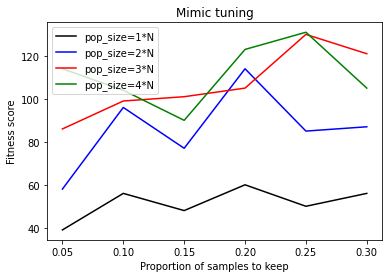

In [102]:
tests = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
scores_low_pop = [0.0]*len(tests)
scores_norm_pop = [0.0]*len(tests)
scores_high_pop = [0.0]*len(tests)
scores_v_high_pop = [0.0]*len(tests)
init_states = np.array(50*[1, 0])
for l in [6, 10, 15, 30]:
    print(l, end=' ')
    for i, j in enumerate(tests):
        problem = mlrose.DiscreteOpt(length = int(l), fitness_fn = mlrose.FourPeaks(t_pct=0.3), maximize = True, max_val = 2)
        init_state = np.array(init_states[:l])
        for k in range(2):
            best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size = int(1*l), keep_pct=j,
                                                          max_attempts = int(l), fast_mimic=True, curve=True, random_state=0)
            scores_low_pop[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size = int(2*l), keep_pct=j,
                                                          max_attempts = int(l), fast_mimic=True, curve=True, random_state=0)
            scores_norm_pop[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size = int(3*l), keep_pct=j,
                                                          max_attempts = int(l), fast_mimic=True, curve=True, random_state=0)
            scores_high_pop[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size = int(4*l), keep_pct=j,
                                                          max_attempts = int(l), fast_mimic=True, curve=True, random_state=0)
            scores_v_high_pop[i] += best_fitness
plt.plot(tests, scores_low_pop, c='black', label='pop_size=1*N')
plt.plot(tests, scores_norm_pop, c='blue', label='pop_size=2*N')
plt.plot(tests, scores_high_pop, c='red', label='pop_size=3*N')
plt.plot(tests, scores_v_high_pop, c='green', label='pop_size=4*N')
plt.title('Mimic tuning')
plt.xlabel('Proportion of samples to keep')
plt.ylabel('Fitness score')
plt.legend()

Text(0, 0.5, 'Fitness score')

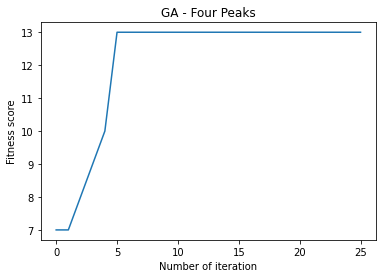

In [107]:
init_states = np.array(50*[1, 0])
problem = mlrose.DiscreteOpt(length = 20, fitness_fn = mlrose.FourPeaks(t_pct=0.3), maximize = True, max_val = 2)
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size = 2*20, keep_pct=0.25,
                                                          max_attempts = 20, fast_mimic=True, curve=True, random_state=0)
plt.plot(fitness_curve)
plt.title('Mimic - Four Peaks')
plt.xlabel('Number of iteration')
plt.ylabel('Fitness score')

### Comparison

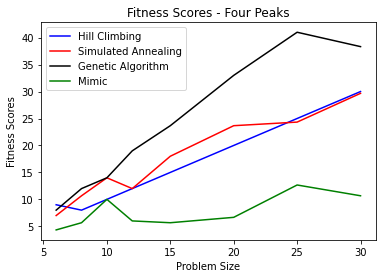

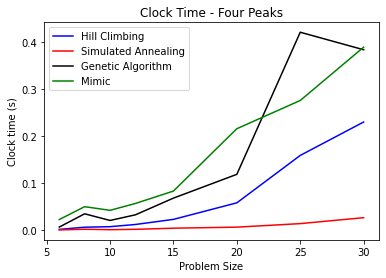

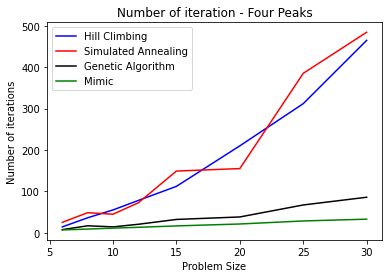

In [10]:
lengths = np.array([6, 8, 10, 12, 15, 20, 25, 30])
HC = np.zeros(np.shape(lengths)[0])
SA = np.zeros(np.shape(lengths)[0])
GA = np.zeros(np.shape(lengths)[0])
MM = np.zeros(np.shape(lengths)[0])
t_HC = np.zeros(np.shape(lengths)[0])
t_SA = np.zeros(np.shape(lengths)[0])
t_GA = np.zeros(np.shape(lengths)[0])
t_MM = np.zeros(np.shape(lengths)[0])
i_HC = np.zeros(np.shape(lengths)[0])
i_SA = np.zeros(np.shape(lengths)[0])
i_GA = np.zeros(np.shape(lengths)[0])
i_MM = np.zeros(np.shape(lengths)[0])

fitness = mlrose.FourPeaks(t_pct=0.3)
schedule = mlrose.ExpDecay()
init_states = np.array(50*[1, 0])

for i, l in enumerate(lengths):
    problem = mlrose.DiscreteOpt(length = int(l), fitness_fn = fitness, maximize = True, max_val = 2)
    init_state = np.array(init_states[:l])
    n = 3
    for j in range(n):
        t1 = time.time()
        best_state, best_fitness, fitness_curve = mlrose.hill_climb(problem, restarts = int(l), 
                                                                init_state = init_state, curve=True, random_state=0)
        t2 = time.time()
        HC[i] += float(best_fitness) / float(n)
        t_HC[i] += float(t2-t1) / float(n)
        i_HC[i] += float(np.shape(fitness_curve)[0]) / float(n)
        t1 = time.time()
        best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = schedule,
                                                                         max_attempts = int(1.5*l), init_state = init_state, curve=True, random_state=0)
        t2 = time.time()
        SA[i] += float(best_fitness) / float(n)
        t_SA[i] += float(t2-t1) / float(n)
        i_SA[i] += float(np.shape(fitness_curve)[0]) / float(n)
        t1 = time.time()
        best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(1.5*l), mutation_prob=0.05,
                                                                     max_attempts = int(l), curve=True, random_state=0)
        t2 = time.time()
        GA[i] += float(best_fitness) / float(n)
        t_GA[i] += float(t2-t1) / float(n)
        i_GA[i] += float(np.shape(fitness_curve)[0]) / float(n)
        t1 = time.time()
        best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size = int(1.5*l), keep_pct=0.10,
                                                          max_attempts = int(l), fast_mimic=True, curve=True, random_state=0)
        t2 = time.time()
        MM[i] += float(best_fitness) / float(n)
        t_MM[i] += float(t2-t1) / float(n)
        i_MM[i] += float(np.shape(fitness_curve)[0]) / float(n)
        
plt.figure()
plt.plot(lengths, HC, c='blue', label='Hill Climbing')
plt.plot(lengths, SA, c='red', label='Simulated Annealing')
plt.plot(lengths, GA, c='black', label='Genetic Algorithm')
plt.plot(lengths, MM, c='green', label='Mimic')
plt.title('Fitness Scores - Four Peaks')
plt.xlabel('Problem Size')
plt.ylabel('Fitness Scores')
plt.legend()
plt.figure()
plt.plot(lengths, t_HC, c='blue', label='Hill Climbing')
plt.plot(lengths, t_SA, c='red', label='Simulated Annealing')
plt.plot(lengths, t_GA, c='black', label='Genetic Algorithm')
plt.plot(lengths, t_MM, c='green', label='Mimic')
plt.title('Clock Time - Four Peaks')
plt.xlabel('Problem Size')
plt.ylabel('Clock time (s)')
plt.legend()
plt.figure()
plt.plot(lengths, i_HC, c='blue', label='Hill Climbing')
plt.plot(lengths, i_SA, c='red', label='Simulated Annealing')
plt.plot(lengths, i_GA, c='black', label='Genetic Algorithm')
plt.plot(lengths, i_MM, c='green', label='Mimic')
plt.title('Number of iteration - Four Peaks')
plt.xlabel('Problem Size')
plt.ylabel('Number of iterations')
plt.legend()

## Count Ones

In [108]:
def cust_fn(state):
    n = 0
    for i in range(len(state)):
        if state[i] == 1:
            n += 1
    return n

fitness = mlrose.CustomFitness(cust_fn)
init_states = np.array(100*[0, 1])

### RHC tuning

6 10 15 30 

Text(0, 0.5, 'Fitness score')

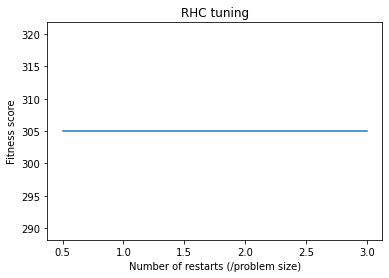

In [109]:
tests = [0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0]
scores = [0.0]*len(tests)
for l in [6, 10, 15, 30]:
    print(l, end=' ')
    for i, j in enumerate(tests):
        for k in range(5):
            problem = mlrose.DiscreteOpt(length = int(l), fitness_fn = fitness, maximize = True, max_val = 2)
            init_state = np.array(init_states[:l])
            best_state, best_fitness, fitness_curve = mlrose.hill_climb(problem, restarts = int(l*j), init_state = init_state, curve=True, random_state=0)
            scores[i] += best_fitness
plt.plot(tests, scores)
plt.title('RHC tuning')
plt.xlabel('Number of restarts (/problem size)')
plt.ylabel('Fitness score')

Text(0, 0.5, 'Fitness score')

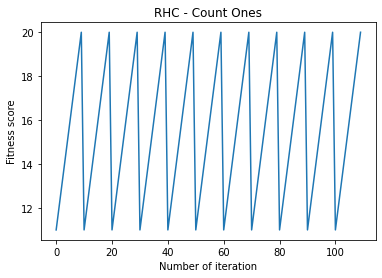

In [116]:
problem = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness, maximize = True, max_val = 3)
best_state, best_fitness, fitness_curve = mlrose.hill_climb(problem, restarts = 10, init_state = init_state[:20], curve=True, random_state=0)
plt.plot(fitness_curve)
plt.title('RHC - Count Ones')
plt.xlabel('Number of iteration')
plt.ylabel('Fitness score')

### SA tuning

6 10 15 30 50 

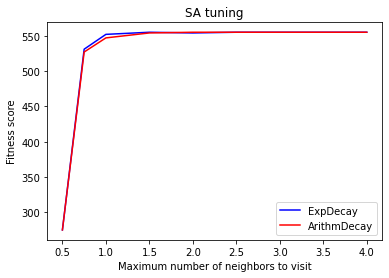

In [53]:
tests = [0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0]
scores_ExpDecay = [0.0]*len(tests)
scores_ArithDecay = [0.0]*len(tests)
for l in [6, 10, 15, 30, 50]:
    print(l, end=' ')
    for i, j in enumerate(tests):
        problem = mlrose.DiscreteOpt(length = int(l), fitness_fn = fitness, maximize = True, max_val = 2)
        init_state = np.array(init_states[:l])
        for k in range(5):
            best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = mlrose.ExpDecay(), 
                                                                         max_attempts = int(l*i), init_state = init_state, curve=True, random_state=0)
            scores_ExpDecay[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = mlrose.ArithDecay(), 
                                                                         max_attempts = int(l*i), init_state = init_state, curve=True, random_state=0)
            scores_ArithDecay[i] += best_fitness
plt.title('SA tuning')
plt.xlabel('Maximum number of neighbors to visit')
plt.ylabel('Fitness score')
plt.plot(tests, scores_ExpDecay, c='blue', label='ExpDecay')
plt.plot(tests, scores_ArithDecay, c='red', label='ArithmDecay')
plt.legend()

Text(0, 0.5, 'Fitness score')

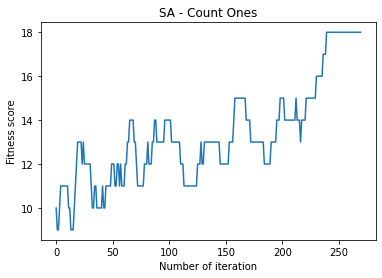

In [118]:
problem = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness, maximize = True, max_val = 3)
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = mlrose.ExpDecay(), 
                                                                         max_attempts = int(1.5*20), init_state = init_state[:20], curve=True, random_state=0)
plt.plot(fitness_curve)
plt.title('SA - Count Ones')
plt.xlabel('Number of iteration')
plt.ylabel('Fitness score')

### GA tuning

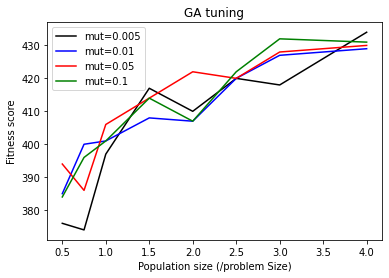

In [51]:
tests = [0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0]
scores_v_low_mut = [0.0]*len(tests)
scores_low_mut = [0.0]*len(tests)
scores_norm_mut = [0.0]*len(tests)
scores_high_mut = [0.0]*len(tests)
for l in [6, 10, 15, 30, 50]:
    for i, j in enumerate(tests):
        problem = mlrose.DiscreteOpt(length = int(l), fitness_fn = fitness, maximize = True, max_val = 2)
        init_state = np.array(init_states[:l])
        for k in range(5):
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(l*j), mutation_prob=0.005,
                                                          max_attempts = 1, curve=True, random_state=0)
            scores_v_low_mut[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(l*j), mutation_prob=0.01,
                                                          max_attempts = 1, curve=True, random_state=0)
            scores_low_mut[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(l*j), mutation_prob=0.05,
                                                          max_attempts = 1, curve=True, random_state=0)
            scores_norm_mut[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(l*j), mutation_prob=0.1,
                                                          max_attempts = 1, curve=True, random_state=0)
            scores_high_mut[i] += best_fitness
plt.plot(tests, scores_v_low_mut, c='black', label='mut=0.005')
plt.plot(tests, scores_low_mut, c='blue', label='mut=0.01')
plt.plot(tests, scores_norm_mut, c='red', label='mut=0.05')
plt.plot(tests, scores_high_mut, c='green', label='mut=0.1')
plt.title('GA tuning')
plt.xlabel('Population size (/problem Size)')
plt.ylabel('Fitness score')
plt.legend()

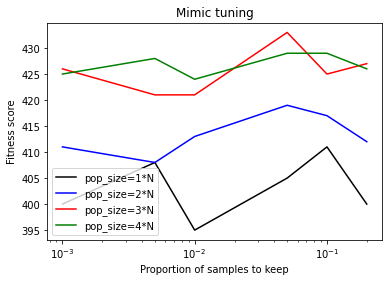

In [52]:
tests = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
scores_low_pop = [0.0]*len(tests)
scores_norm_pop = [0.0]*len(tests)
scores_high_pop = [0.0]*len(tests)
scores_v_high_pop = [0.0]*len(tests)
for l in [6, 10, 15, 30, 50]:
    for i, j in enumerate(tests):
        problem = mlrose.DiscreteOpt(length = int(l), fitness_fn = fitness, maximize = True, max_val = 2)
        init_state = np.array(init_states[:l])
        for k in range(5):
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(l*1.0), mutation_prob=j,
                                                          max_attempts = 1, curve=True, random_state=0)
            scores_low_pop[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(l*2.0), mutation_prob=j,
                                                          max_attempts = 1, curve=True, random_state=0)
            scores_norm_pop[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(l*3.0), mutation_prob=j,
                                                          max_attempts = 1, curve=True, random_state=0)
            scores_high_pop[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(l*4.0), mutation_prob=j,
                                                          max_attempts = 1, curve=True, random_state=0)
            scores_v_high_pop[i] += best_fitness
plt.semilogx(tests, scores_low_pop, c='black', label='pop_size=1*N')
plt.semilogx(tests, scores_norm_pop, c='blue', label='pop_size=2*N')
plt.semilogx(tests, scores_high_pop, c='red', label='pop_size=3*N')
plt.semilogx(tests, scores_v_high_pop, c='green', label='pop_size=4*N')
plt.legend()

### Mimic tuning

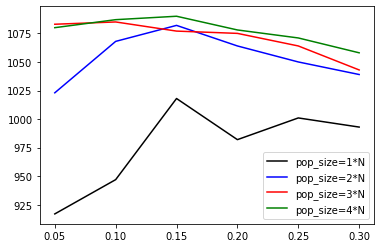

In [48]:
tests = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
scores_low_pop = [0.0]*len(tests)
scores_norm_pop = [0.0]*len(tests)
scores_high_pop = [0.0]*len(tests)
scores_v_high_pop = [0.0]*len(tests)
for l in [6, 10, 15, 30, 50]:
    for i, j in enumerate(tests):
        problem = mlrose.DiscreteOpt(length = int(l), fitness_fn = fitness, maximize = True, max_val = 2)
        init_state = np.array(init_states[:l])
        for k in range(10):
            best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size = int(1*l), keep_pct=j,
                                                          max_attempts = 1, fast_mimic=True, curve=True, random_state=0)
            scores_low_pop[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size = int(2*l), keep_pct=j,
                                                          max_attempts = 1, fast_mimic=True, curve=True, random_state=0)
            scores_norm_pop[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size = int(3*l), keep_pct=j,
                                                          max_attempts = 1, fast_mimic=True, curve=True, random_state=0)
            scores_high_pop[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size = int(4*l), keep_pct=j,
                                                          max_attempts = 1, fast_mimic=True, curve=True, random_state=0)
            scores_v_high_pop[i] += best_fitness
plt.plot(tests, scores_low_pop, c='black', label='pop_size=1*N')
plt.plot(tests, scores_norm_pop, c='blue', label='pop_size=2*N')
plt.plot(tests, scores_high_pop, c='red', label='pop_size=3*N')
plt.plot(tests, scores_v_high_pop, c='green', label='pop_size=4*N')
plt.title('Mimic tuning')
plt.xlabel('Proportion of samples to keep')
plt.ylabel('Fitness score')
plt.legend()

0 1 2 3 4 5 6 7 8 9 

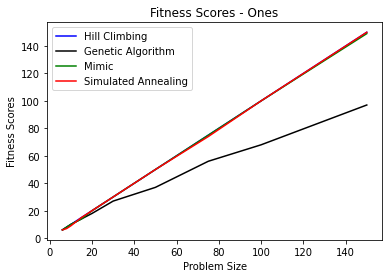

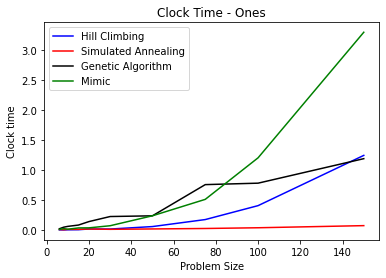

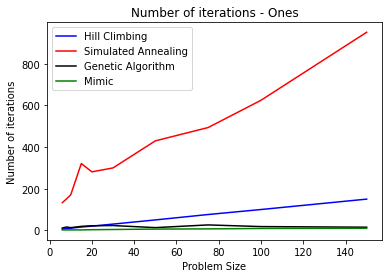

In [63]:
lengths = np.array([6, 8, 10, 15, 20, 30, 50, 75, 100, 150])
HC = np.zeros(np.shape(lengths)[0])
SA = np.zeros(np.shape(lengths)[0])
GA = np.zeros(np.shape(lengths)[0])
MM = np.zeros(np.shape(lengths)[0])
t_HC = np.zeros(np.shape(lengths)[0])
t_SA = np.zeros(np.shape(lengths)[0])
t_GA = np.zeros(np.shape(lengths)[0])
t_MM = np.zeros(np.shape(lengths)[0])
i_HC = np.zeros(np.shape(lengths)[0])
i_SA = np.zeros(np.shape(lengths)[0])
i_GA = np.zeros(np.shape(lengths)[0])
i_MM = np.zeros(np.shape(lengths)[0])

def cust_fn(state):
    n = 0
    for i in range(len(state)):
        if state[i] == 1:
            n += 1
    return n

fitness = mlrose.CustomFitness(cust_fn)
schedule = mlrose.ExpDecay()
init_states = np.array(100*[0, 1])

for i, l in enumerate(lengths):
    print(i, end=' ')
    problem = mlrose.DiscreteOpt(length = int(l), fitness_fn = fitness, maximize = True, max_val = 2)
    init_state = np.array(init_states[:l])
    n = 1
    for j in range(n):
        t1 = time.time()
        best_state, best_fitness, fitness_curve = mlrose.hill_climb(problem, restarts = 1, 
                                                                init_state = init_state, curve=True, random_state=0)
        t2 = time.time()
        HC[i] += float(best_fitness) / float(n)
        t_HC[i] += float(t2-t1) / float(n)
        i_HC[i] += float(np.shape(fitness_curve)[0]) / float(n)
        t1 = time.time()
        best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = schedule, 
                                                                         max_attempts = int(1.5*l), init_state = init_state, curve=True, random_state=0)
        t2 = time.time()
        SA[i] += float(best_fitness) / float(n)
        t_SA[i] += float(t2-t1) / float(n)
        i_SA[i] += float(np.shape(fitness_curve)[0]) / float(n)
        t1 = time.time()
        best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(3*l), mutation_prob=0.1,
                                                          max_attempts = 10, curve=True, random_state=0)
        t2 = time.time()
        GA[i] += float(best_fitness) / float(n)
        t_GA[i] += float(t2-t1) / float(n)
        i_GA[i] += float(np.shape(fitness_curve)[0]) / float(n)
        t1 = time.time()
        best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size = int(12*l), keep_pct=0.15,
                                                          max_attempts = 1, fast_mimic=True, curve=True, random_state=0)
        t2 = time.time()
        MM[i] += float(best_fitness) / float(n)
        t_MM[i] += float(t2-t1) / float(n)
        i_MM[i] += float(np.shape(fitness_curve)[0]) / float(n)

plt.figure()
plt.plot(lengths, HC, c='blue', label='Hill Climbing')
plt.plot(lengths, GA, c='black', label='Genetic Algorithm')
plt.plot(lengths, MM, c='green', label='Mimic')
plt.plot(lengths, SA, c='red', label='Simulated Annealing')
plt.title('Fitness Scores - Ones')
plt.xlabel('Problem Size')
plt.ylabel('Fitness Scores')
plt.legend()
plt.figure()
plt.plot(lengths, t_HC, c='blue', label='Hill Climbing')
plt.plot(lengths, t_SA, c='red', label='Simulated Annealing')
plt.plot(lengths, t_GA, c='black', label='Genetic Algorithm')
plt.plot(lengths, t_MM, c='green', label='Mimic')
plt.title('Clock Time - Ones')
plt.xlabel('Problem Size')
plt.ylabel('Clock time')
plt.legend()
plt.figure()
plt.plot(lengths, i_HC, c='blue', label='Hill Climbing')
plt.plot(lengths, i_SA, c='red', label='Simulated Annealing')
plt.plot(lengths, i_GA, c='black', label='Genetic Algorithm')
plt.plot(lengths, i_MM, c='green', label='Mimic')
plt.title('Number of iterations - Ones')
plt.xlabel('Problem Size')
plt.ylabel('Number of iterations')
plt.legend()

## +1%3

In [251]:
def cust_fn(state):
    n = 0
    for i in range(len(state)-1):
        if (state[i] + 1) % 2 == state[i+1]:
            n += 1
    return n
fitness = mlrose.CustomFitness(cust_fn)

6 10 15 

Text(0, 0.5, 'Fitness score')

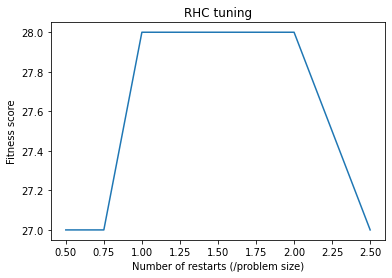

In [254]:
tests = [0.5, 0.75, 1.0, 1.5, 2.0, 2.5]
scores = [0.0]*len(tests)
init_states = np.array(50*[0, 0])
for l in [6, 10, 15]:
    print(l, end=' ')
    for i, j in enumerate(tests):
        for k in range(1):
            problem = mlrose.DiscreteOpt(length = int(l), fitness_fn = fitness, maximize = True, max_val = 3)
            init_state = np.array(init_states[:l])
            best_state, best_fitness, fitness_curve = mlrose.hill_climb(problem, restarts = int(l*j), curve=True, random_state=0)
            scores[i] += best_fitness
plt.plot(tests, scores)
plt.title('RHC tuning')
plt.xlabel('Number of restarts (/problem size)')
plt.ylabel('Fitness score')

Text(0, 0.5, 'Fitness score')

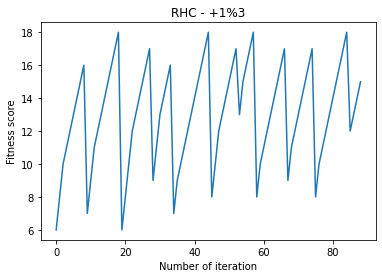

In [253]:
init_states = np.array(50*[0, 0])
problem = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness, maximize = True, max_val = 3)
best_state, best_fitness, fitness_curve = mlrose.hill_climb(problem, restarts = 10, curve=True, random_state=0)
plt.plot(fitness_curve)
plt.title('RHC - +1%3')
plt.xlabel('Number of iteration')
plt.ylabel('Fitness score')

### SA

6 10 15 

/home/raph/.local/lib/python3.6/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


30 

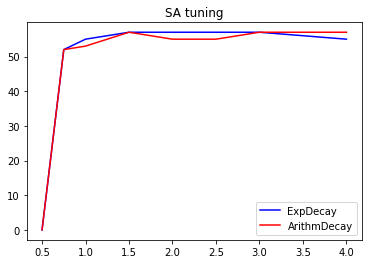

In [255]:
tests = [0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0]
scores_ExpDecay = [0.0]*len(tests)
scores_ArithDecay = [0.0]*len(tests)
init_states = np.array(50*[0, 0])
for l in [6, 10, 15, 30]:
    print(l, end=' ')
    for i, j in enumerate(tests):
        problem = mlrose.DiscreteOpt(length = int(l), fitness_fn = fitness, maximize = True, max_val = 3)
        init_state = np.array(init_states[:l])
        for k in range(1):
            best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = mlrose.ExpDecay(), 
                                                                         max_attempts = int(l*i), init_state = init_state, curve=True, random_state=0)
            scores_ExpDecay[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = mlrose.ArithDecay(), 
                                                                         max_attempts = int(l*i), init_state = init_state, curve=True, random_state=0)
            scores_ArithDecay[i] += best_fitness
plt.title('SA tuning')
plt.plot(tests, scores_ExpDecay, c='blue', label='ExpDecay')
plt.plot(tests, scores_ArithDecay, c='red', label='ArithmDecay')
plt.legend()

Text(0, 0.5, 'Fitness score')

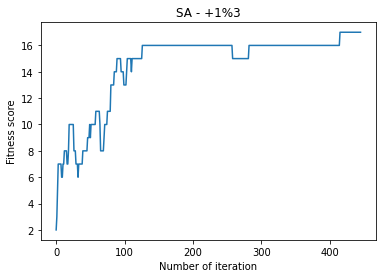

In [256]:
problem = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness, maximize = True, max_val = 3)
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = mlrose.ExpDecay(), 
                                                                         max_attempts = 1.5*20, init_state = init_state[:20], curve=True, random_state=0)
plt.plot(fitness_curve)
plt.title('SA - +1%3')
plt.xlabel('Number of iteration')
plt.ylabel('Fitness score')

### GA

6 10 15 30 

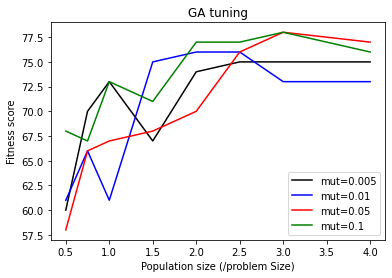

In [257]:
tests = [0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0]
scores_v_low_mut = [0.0]*len(tests)
scores_low_mut = [0.0]*len(tests)
scores_norm_mut = [0.0]*len(tests)
scores_high_mut = [0.0]*len(tests)
init_states = np.array(50*[0, 0])
for l in [6, 10, 15, 30]:
    print(l, end=' ')
    for i, j in enumerate(tests):
        problem = mlrose.DiscreteOpt(length = int(l), fitness_fn = fitness, maximize = True, max_val = 3)        
        init_state = np.array(init_states[:l])
        for k in range(2):
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(l*j), mutation_prob=0.005,
                                                          max_attempts = 1, curve=True, random_state=0)
            scores_v_low_mut[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(l*j), mutation_prob=0.01,
                                                          max_attempts = 1, curve=True, random_state=0)
            scores_low_mut[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(l*j), mutation_prob=0.05,
                                                          max_attempts = 1, curve=True, random_state=0)
            scores_norm_mut[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(l*j), mutation_prob=0.1,
                                                          max_attempts = 1, curve=True, random_state=0)
            scores_high_mut[i] += best_fitness
plt.plot(tests, scores_v_low_mut, c='black', label='mut=0.005')
plt.plot(tests, scores_low_mut, c='blue', label='mut=0.01')
plt.plot(tests, scores_norm_mut, c='red', label='mut=0.05')
plt.plot(tests, scores_high_mut, c='green', label='mut=0.1')
plt.title('GA tuning')
plt.xlabel('Population size (/problem Size)')
plt.ylabel('Fitness score')
plt.legend()

### Mimic

6 10 15 30 

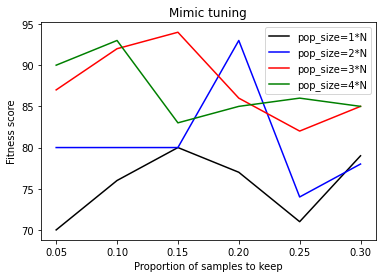

In [259]:
tests = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
scores_low_pop = [0.0]*len(tests)
scores_norm_pop = [0.0]*len(tests)
scores_high_pop = [0.0]*len(tests)
scores_v_high_pop = [0.0]*len(tests)
init_states = np.array(50*[0, 0])
for l in [6, 10, 15, 30]:
    print(l, end=' ')
    for i, j in enumerate(tests):
        problem = mlrose.DiscreteOpt(length = int(l), fitness_fn = fitness, maximize = True, max_val = 3)
        init_state = np.array(init_states[:l])
        for k in range(2):
            best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size = int(1*l), keep_pct=j,
                                                          max_attempts = 1, fast_mimic=True, curve=True, random_state=0)
            scores_low_pop[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size = int(2*l), keep_pct=j,
                                                          max_attempts = 1, fast_mimic=True, curve=True, random_state=0)
            scores_norm_pop[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size = int(3*l), keep_pct=j,
                                                          max_attempts = 1, fast_mimic=True, curve=True, random_state=0)
            scores_high_pop[i] += best_fitness
            best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size = int(4*l), keep_pct=j,
                                                          max_attempts = 1, fast_mimic=True, curve=True, random_state=0)
            scores_v_high_pop[i] += best_fitness
plt.plot(tests, scores_low_pop, c='black', label='pop_size=1*N')
plt.plot(tests, scores_norm_pop, c='blue', label='pop_size=2*N')
plt.plot(tests, scores_high_pop, c='red', label='pop_size=3*N')
plt.plot(tests, scores_v_high_pop, c='green', label='pop_size=4*N')
plt.title('Mimic tuning')
plt.xlabel('Proportion of samples to keep')
plt.ylabel('Fitness score')
plt.legend()

0 1 2 3 4 5 6 7 8 9 

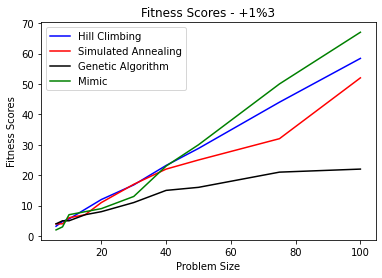

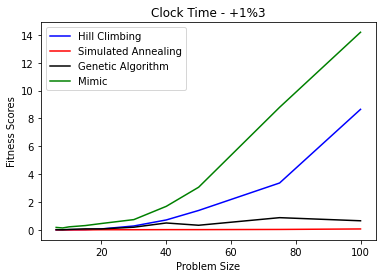

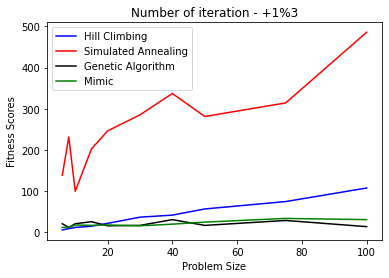

In [263]:
lengths = np.array([6, 8, 10, 15, 20, 30, 40, 50, 75, 100])
HC = np.zeros(np.shape(lengths)[0])
SA = np.zeros(np.shape(lengths)[0])
GA = np.zeros(np.shape(lengths)[0])
MM = np.zeros(np.shape(lengths)[0])
t_HC = np.zeros(np.shape(lengths)[0])
t_SA = np.zeros(np.shape(lengths)[0])
t_GA = np.zeros(np.shape(lengths)[0])
t_MM = np.zeros(np.shape(lengths)[0])
i_HC = np.zeros(np.shape(lengths)[0])
i_SA = np.zeros(np.shape(lengths)[0])
i_GA = np.zeros(np.shape(lengths)[0])
i_MM = np.zeros(np.shape(lengths)[0])

def cust_fn(state):
    n = 0
    for i in range(len(state)-1):
        if (state[i] + 1) % 10 == state[i+1]:
            n += 1
    return n

fitness = mlrose.CustomFitness(cust_fn)
schedule = mlrose.ExpDecay()
init_states = np.array(50*[0, 0])
        

for i, l in enumerate(lengths):
    print(i, end=' ')
    problem = mlrose.DiscreteOpt(length = int(l), fitness_fn = fitness, maximize = True, max_val = 10)
    init_state = np.array(init_states[:l])
    n = 1
    for j in range(n):
        t1 = time.time()
        best_state, best_fitness, fitness_curve = mlrose.hill_climb(problem, restarts = 1, curve=True, random_state=0)
        t2 = time.time()
        HC[i] += float(best_fitness) / float(n)
        t_HC[i] += float(t2-t1) / float(n)
        i_HC[i] += float(np.shape(fitness_curve)[0]) / float(n)
        t1 = time.time()
        best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = schedule, 
                                                                         max_attempts = 10, init_state = init_state, curve=True, random_state=0)
        t2 = time.time()
        SA[i] += float(best_fitness) / float(n)
        t_SA[i] += float(t2-t1) / float(n)
        i_SA[i] += float(np.shape(fitness_curve)[0]) / float(n)
        t1 = time.time()
        best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = int(2*l),
                                                          max_attempts = 10, curve=True, random_state=0)
        t2 = time.time()
        GA[i] += float(best_fitness) / float(n)
        t_GA[i] += float(t2-t1) / float(n)
        i_GA[i] += float(np.shape(fitness_curve)[0]) / float(n)
        t1 = time.time()
        best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size = int(4*l), keep_pct=0.15,
                                                          max_attempts = 10, fast_mimic=True, curve=True, random_state=0)
        t2 = time.time()
        MM[i] += float(best_fitness) / float(n)
        t_MM[i] += float(t2-t1) / float(n)
        i_MM[i] += float(np.shape(fitness_curve)[0]) / float(n)
        
plt.figure()
plt.plot(lengths, HC, c='blue', label='Hill Climbing')
plt.plot(lengths, SA, c='red', label='Simulated Annealing')
plt.plot(lengths, GA, c='black', label='Genetic Algorithm')
plt.plot(lengths, MM, c='green', label='Mimic')
plt.title('Fitness Scores - +1%3')
plt.xlabel('Problem Size')
plt.ylabel('Fitness Scores')
plt.legend()
plt.figure()
plt.plot(lengths, t_HC, c='blue', label='Hill Climbing')
plt.plot(lengths, t_SA, c='red', label='Simulated Annealing')
plt.plot(lengths, t_GA, c='black', label='Genetic Algorithm')
plt.plot(lengths, t_MM, c='green', label='Mimic')
plt.title('Clock Time - +1%3')
plt.xlabel('Problem Size')
plt.ylabel('Fitness Scores')
plt.legend()
plt.figure()
plt.plot(lengths, i_HC, c='blue', label='Hill Climbing')
plt.plot(lengths, i_SA, c='red', label='Simulated Annealing')
plt.plot(lengths, i_GA, c='black', label='Genetic Algorithm')
plt.plot(lengths, i_MM, c='green', label='Mimic')
plt.title('Number of iteration - +1%3')
plt.xlabel('Problem Size')
plt.ylabel('Fitness Scores')
plt.legend()

### Neural Network

In [264]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, cross_validate
from sklearn import tree, svm, preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_precision_recall_curve, f1_score, precision_score, recall_score, accuracy_score
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import numpy as np
import time
import statistics

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

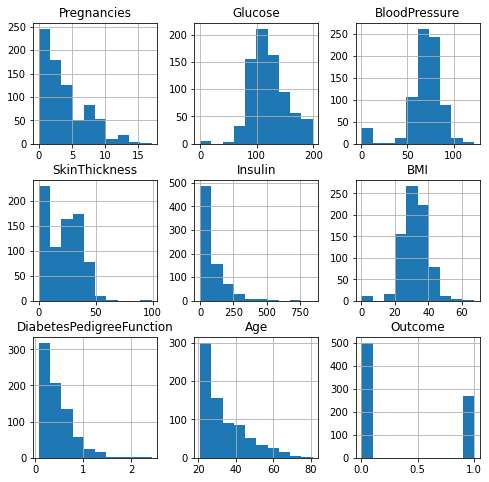

In [265]:
dataset = read_csv('diabetes.csv')
dataset.dropna(inplace=True)
dataset.hist(figsize=(8,8))

In [266]:
dataset = dataset.loc[dataset.BloodPressure != 0,:]
dataset = dataset.loc[dataset.Glucose != 0,:]
dataset = dataset.loc[dataset.BMI != 0,:]

train_ds, test_ds = train_test_split(dataset, train_size=0.75, random_state=20, stratify=dataset['Outcome'])

y_train = train_ds.Outcome
X_train = train_ds.drop('Outcome', axis=1)
y_test = test_ds.Outcome
X_test = test_ds.drop('Outcome', axis=1)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = DataFrame(data=scaler.transform(X_train),columns=X_train.columns)
X_test = DataFrame(data=scaler.transform(X_test),columns=X_test.columns)

def LC(model_name, model, step=8, fit_per_step=2, average='binary'):
    n = X_train.shape[0]
    size = np.zeros(step)
    train_scores = np.zeros(step)
    test_scores = np.zeros(step)
    train_time = np.zeros(step)
    for e,i in enumerate(np.power(np.linspace(0.3,1.0,step),3)):
        X = X_train.head(round(i * n))
        y = y_train.head(round(i * n))
        size[e] = round(i * n)
        for _ in range(fit_per_step):
            t1 = time.time()
            model.fit(X,y)
            t2 = time.time()
            train_scores[e] += f1_score(model.predict(X),y, average=average)
            test_scores[e] += f1_score(model.predict(X_test),y_test, average=average)
            train_time[e] += t2-t1
        train_scores[e] /= fit_per_step
        test_scores[e] /= fit_per_step
        train_time /= fit_per_step
    plt.figure()
    plt.plot(size, train_scores, 'black', label='Training Score')
    plt.plot(size, test_scores, 'red', label='Testing Score')
    plt.title('Model: ' + str(model_name))
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.figure()
    plt.plot(size, train_time, 'blue')
    plt.title('Model: ' + str(model_name))
    plt.xlabel('Training Size')
    plt.ylabel('Fit time')
    plt.grid()

### Random Hill Climbing

0.8103130755064457
0.7182320441988951
1090.4166564941406


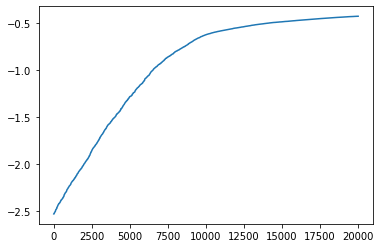

In [183]:
nnRHC = mlrose.NeuralNetwork(hidden_nodes = [20, 20], activation = 'relu',
                                    algorithm = 'random_hill_climb', max_iters=20000, bias = True, learning_rate = 0.01,
                                    early_stopping = True, clip_max = 1e+10, max_attempts = 30, restarts=10,
                                    curve=True, random_state = 0)
t1_RHC = time.time()
nnRHC.fit(X_train, y_train)
t2_RHC = time.time()

plt.plot(nnRHC.fitness_curve)
y_train_pred = nnRHC.predict(X_train)
print(accuracy_score(y_train, y_train_pred))
y_test_pred = nnRHC.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(t2_RHC-t1_RHC)

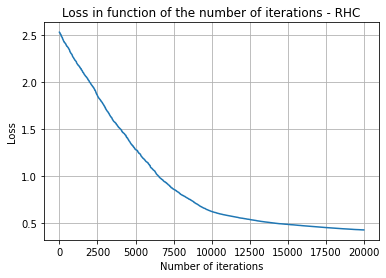

In [202]:
plt.figure()
plt.plot(-nnRHC.fitness_curve)
plt.title('Loss in function of the number of iterations - RHC')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.grid()

Text(0, 0.5, 'Value of the weights')

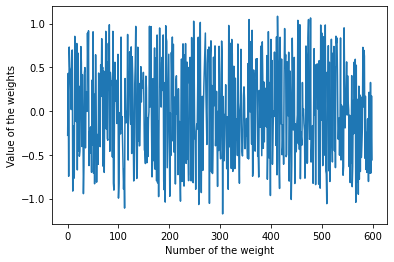

In [187]:
plt.plot(nnRHC.fitted_weights)
plt.title('Viualization of the weights values')
plt.xlabel('Number of the weight')
plt.ylabel('Value of the weights')

In [209]:
print('Fit time:', round(t2_RHC-t1_RHC,2))
print('Number of iterations: ', len(nnRHC.fitness_curve))
print('Time per iteration: ', (t2_RHC-t1_RHC)/len(nnRHC.fitness_curve))
y_train_pred = nnRHC.predict(X_train)
y_test_pred = nnRHC.predict(X_test)
print('Accuracy score (train set): ', round(accuracy_score(y_train, y_train_pred),2))
print('Accuracy score (test set): ', round(accuracy_score(y_test, y_test_pred),2))
print('F1_score score (train set): ', round(f1_score(y_train, y_train_pred),2))
print('F1_score score (test set): ', round(f1_score(y_test, y_test_pred),2))

Fit time: 1090.42
Number of iterations:  20000
Time per iteration:  0.05452083282470703
Accuracy score (train set):  0.81
Accuracy score (test set):  0.72
F1_score score (train set):  0.71
F1_score score (test set):  0.53


## Simulated Annealing

0.6758747697974218
0.6961325966850829
184.20373392105103


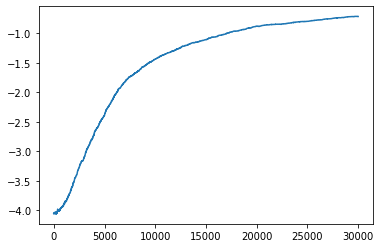

In [199]:
nnSA = mlrose.NeuralNetwork(hidden_nodes = [20, 20], activation = 'relu',
                                        algorithm = 'simulated_annealing', max_iters=30000, bias = True, learning_rate = 0.01,
                                        early_stopping = True, clip_max = 1e+10, max_attempts = 100, schedule=mlrose.ExpDecay(),
                                        curve=True, random_state = 0)
t1_SA = time.time()
nnSA.fit(X_train, y_train)
t2_SA = time.time()

plt.plot(nnSA.fitness_curve)
y_train_pred = nnSA.predict(X_train)
print(accuracy_score(y_train, y_train_pred))
y_test_pred = nnSA.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(t2_SA-t1_SA)

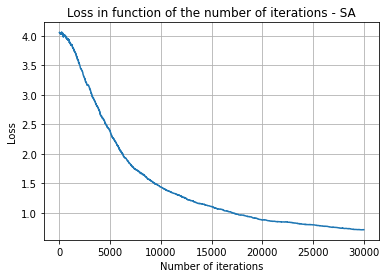

In [201]:
plt.figure()
plt.plot(-nnSA.fitness_curve)
plt.title('Loss in function of the number of iterations - SA')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.grid()

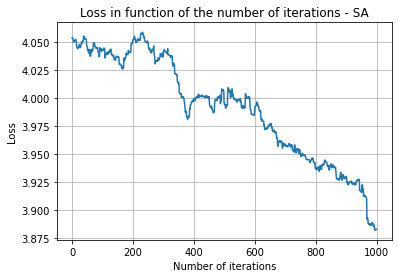

In [221]:
plt.figure()
plt.plot(-nnSA.fitness_curve[:1000])
plt.title('Loss in function of the number of iterations - SA')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.grid()

Text(0, 0.5, 'Value of the weights')

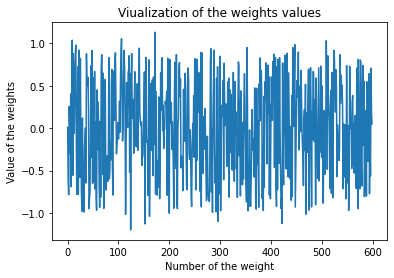

In [223]:
plt.plot(nnSA.fitted_weights)
plt.title('Viualization of the weights values')
plt.xlabel('Number of the weight')
plt.ylabel('Value of the weights')

In [207]:
print('Fit time:', round(t2_SA-t1_SA,2))
print('Number of iterations: ', len(nnSA.fitness_curve))
print('Time per iteration: ', (t2_SA-t1_SA)/len(nnSA.fitness_curve))
y_train_pred = nnSA.predict(X_train)
y_test_pred = nnSA.predict(X_test)
print('Accuracy score (train set): ', round(accuracy_score(y_train, y_train_pred),2))
print('Accuracy score (test set): ', round(accuracy_score(y_test, y_test_pred),2))
print('F1_score score (train set): ', round(f1_score(y_train, y_train_pred),2))
print('F1_score score (test set): ', round(f1_score(y_test, y_test_pred),2))

Fit time: 184.2
Number of iterations:  30000
Time per iteration:  0.006140124464035034
Accuracy score (train set):  0.68
Accuracy score (test set):  0.7
F1_score score (train set):  0.54
F1_score score (test set):  0.51


## Genetic Algorithm

0.7753222836095764
0.7458563535911602
474.8163764476776


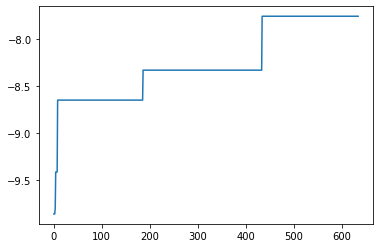

In [216]:
nnGA = mlrose.NeuralNetwork(hidden_nodes = [20, 20], activation = 'relu',
                                        algorithm = 'genetic_alg', max_iters=1000, bias = True, learning_rate = 0.01,
                                        early_stopping = True, clip_max = 1e+10, max_attempts = 200, pop_size=200,
                                        mutation_prob=0.2, curve=True, random_state = 0)
t1_GA = time.time()
nnGA.fit(X_train, y_train)
t2_GA = time.time()

plt.plot(nnGA.fitness_curve)
y_train_pred = nnGA.predict(X_train)
print(accuracy_score(y_train, y_train_pred))
y_test_pred = nnGA.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(t2_GA-t1_GA)

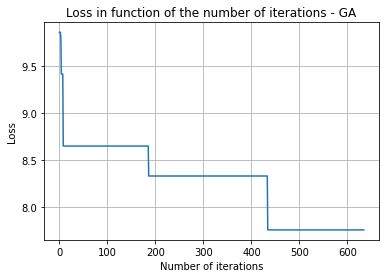

In [222]:
plt.figure()
plt.plot(-nnGA.fitness_curve)
plt.title('Loss in function of the number of iterations - GA')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.grid()

Text(0, 0.5, 'Value of the weights')

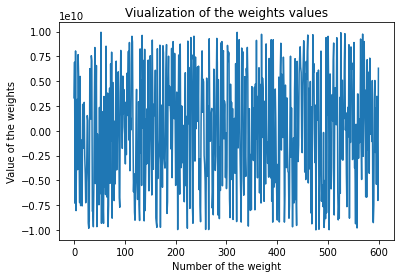

In [224]:
plt.plot(nnGA.fitted_weights)
plt.title('Viualization of the weights values')
plt.xlabel('Number of the weight')
plt.ylabel('Value of the weights')

In [227]:
print('Fit time:', round(t2_GA-t1_GA,2))
print('Number of iterations: ', len(nnGA.fitness_curve))
print('Time per iteration: ', (t2_GA-t1_GA)/len(nnGA.fitness_curve))
y_train_pred = nnGA.predict(X_train)
y_test_pred = nnGA.predict(X_test)
print('Accuracy score (train set): ', round(accuracy_score(y_train, y_train_pred),2))
print('Accuracy score (test set): ', round(accuracy_score(y_test, y_test_pred),2))
print('F1_score score (train set): ', round(f1_score(y_train, y_train_pred),2))
print('F1_score score (test set): ', round(f1_score(y_test, y_test_pred),2))

Fit time: 474.82
Number of iterations:  635
Time per iteration:  0.7477423251144529
Accuracy score (train set):  0.78
Accuracy score (test set):  0.75
F1_score score (train set):  0.64
F1_score score (test set):  0.58


1 2 3 5 8 11 14 18 22 27 32 38 44 51 58 65 73 81 90 100 

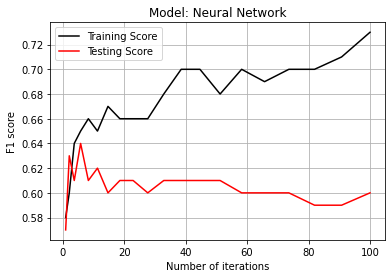

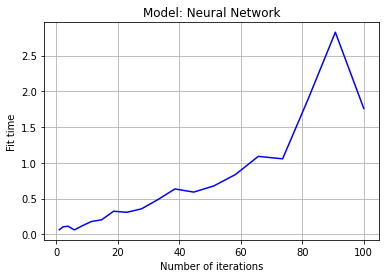

In [79]:


def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
n = 20
I = 100*(np.linspace(0.1,1,n))**2
train_time = np.zeros(n)
train_score = np.zeros(n)
val_score = np.zeros(n)
for c,i in enumerate(I):
    print(int(i), end=' ')
    NN = MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=0.001, activation='tanh', max_iter=int(i))
    t1 = time.time()
    NN.fit(X_train,y_train)
    t2 = time.time()
    train_time[c] = t2-t1
    train_score[c] = round(f1_score(NN.predict(X_train),y_train, average='binary'),2)
    val_score[c] = round(f1_score(NN.predict(X_test),y_test, average='binary'),2)
plt.figure()
plt.plot(I, train_score, 'black', label='Training Score')
plt.plot(I, val_score, 'red', label='Testing Score')
plt.title('Model: Neural Network')
plt.xlabel('Number of iterations')
plt.ylabel('F1 score')
plt.legend()
plt.grid()

plt.figure()
plt.plot(I, train_time, 'blue')
plt.title('Model: Neural Network')
plt.xlabel('Number of iterations')
plt.ylabel('Fit time')
plt.grid()

